<a href="https://colab.research.google.com/github/aNdr3W03/Employee-Attrition-Problem/blob/main/Employee%20Attrition%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Project: Resolving Human Resources Problems**

* Name: Andrew Benedictus Jamesie
* Email: [andrewbjamesie@yahoo.com](mailto:andrewbjamesie@yahoo.com)
* Dicoding ID: [andrewbj](https://dicoding.com/users/andrewbj)

# **1. Preparation**

## **1.1 Library Import**

Import all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

## **1.2 Data Loading**

Load the data from the [source](https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee)

In [ ]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'

# Read dataset
df = pd.read_csv(dataset_url)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## **1.3 Data Preparation**

### 1.3.1 Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

Check the unique value of each categorical data features

In [ ]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
['Human Resources' 'Research & Development' 'Sales'] 

EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Male' 'Female'] 

JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
['Married' 'Single' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



Dataset descriptive statistics for numerical and categorical (object) data

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Based on the analysis of descriptive statistics, all employees are over 18 years old which can be seen in the unique `Over18` feature only 1 data, `Y`. In addition, the `EmployeeCount` feature also only has 1 unique value. So we can eliminate these 2 features because they do not have a major influence on business problems

In [ ]:
df = df.drop(['Over18', 'EmployeeCount'], axis=1)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


### 1.3.2 Missing Value and Duplicate Data Handling

Check for missing value

In [ ]:
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSin

Displaying data that has missing values

In [ ]:
df[df.isnull().any(axis=1)]

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3
1447,1448,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,...,3,80,1,24,3,1,20,8,13,9
1448,1449,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,2,...,2,80,0,8,5,4,3,2,1,2
1462,1463,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,...,4,80,0,21,2,3,2,0,0,2


Since the dataset has several missing value in the `Attrition` feature, which is the main data feature based on the business problem to be solved, we need to drop the missing value data.

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

Check the amount of data row after the missing value handling process

In [ ]:
df.shape

(1058, 33)

Check for data duplicates

In [ ]:
df.duplicated().sum()

0

Check the `Attrition` data type

In [ ]:
df['Attrition'].dtypes

dtype('float64')

Change the `Attrition` data feature from float to integer, since we already clean it

In [ ]:
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition'].dtypes

dtype('int64')

### 1.3.3 Ordinal Decoding

Ordinal Decoding for below features:

| Features | 1 | 2 | 3 | 4 | 5 |
|----------|---|---|---|---|---|
| Education                | Below College | College | Bachelor | Master | Doctor |
| EnvironmentSatisfaction  | Low | Medium | High      | Very High   | - |
| JobInvolvement           | Low | Medium | High      | Very High   | - |
| JobSatisfaction          | Low | Medium | High      | Very High   | - |
| PerformanceRating        | Low | Good   | Excellent | Outstanding | - |
| RelationshipSatisfaction | Low | Medium | High      | Very High   | - |
| WorkLifeBalance          | Low | Good   | Excellent | Outstanding | - |

In [ ]:
def ordinal_decoding(df, feature):
    """
    Convert encoded feature in a DataFrame to corresponding categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame with feature(s) to be converted
        feature (str or list of str) : The feature name(s) to convert

    Returns
        pandas.DataFrame : The DataFrame with feature(s) as categorical labels
    """

    if feature == 'Attrition':
        category = {0: 'No', 1: 'Yes'}
        df[feature] = df[feature].map(category)
    elif feature == 'Education':
        category = {1: 'Below College', 2: 'College', 3: 'Bachelor',
                    4: 'Master', 5: 'Doctor'}
        df[feature] = df[feature].map(category)
    elif feature in ['WorkLifeBalance', 'PerformanceRating']:
        category = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
        df[feature] = df[feature].map(category)
    else:
        category = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
        for f in feature:
            df[f] = df[f].map(category)

    return df

Convert the numerical data to categorical data using the defined function

In [ ]:
df = ordinal_decoding(df, 'Attrition')
df = ordinal_decoding(df, 'Education')
df = ordinal_decoding(df, ['EnvironmentSatisfaction', 'JobInvolvement',
                           'JobSatisfaction', 'RelationshipSatisfaction'])
df = ordinal_decoding(df, ['PerformanceRating', 'WorkLifeBalance'])

df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Low,80,0,10,2,Medium,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Medium,80,1,6,0,High,4,2,0,0


### 1.3.4 Cleaned Data Export

Export the cleaned dataset

In [ ]:
# Dataset for Business Dashboard
df.to_csv('employee_data_cleaned.csv', index=False)

# **2. Data Understanding**

Check the dataset descriptive statistics summary for numerical and categorical data

In [ ]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058,1058,1058,...,1058,1058.0,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,5,6,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,High,...,High,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,410,436,335,...,324,NaN,NaN,NaN,NaN,638,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,NaN,NaN,NaN,...,NaN,80.0,0.762760,11.435728,2.769376,NaN,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,NaN,NaN,NaN,...,NaN,0.0,0.837537,8.016429,1.302689,NaN,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,16.000000,3.000000,NaN,9.000000,7.00000,3.000000,7.000000


## **2.1 Heatmap Correlation Matrix**

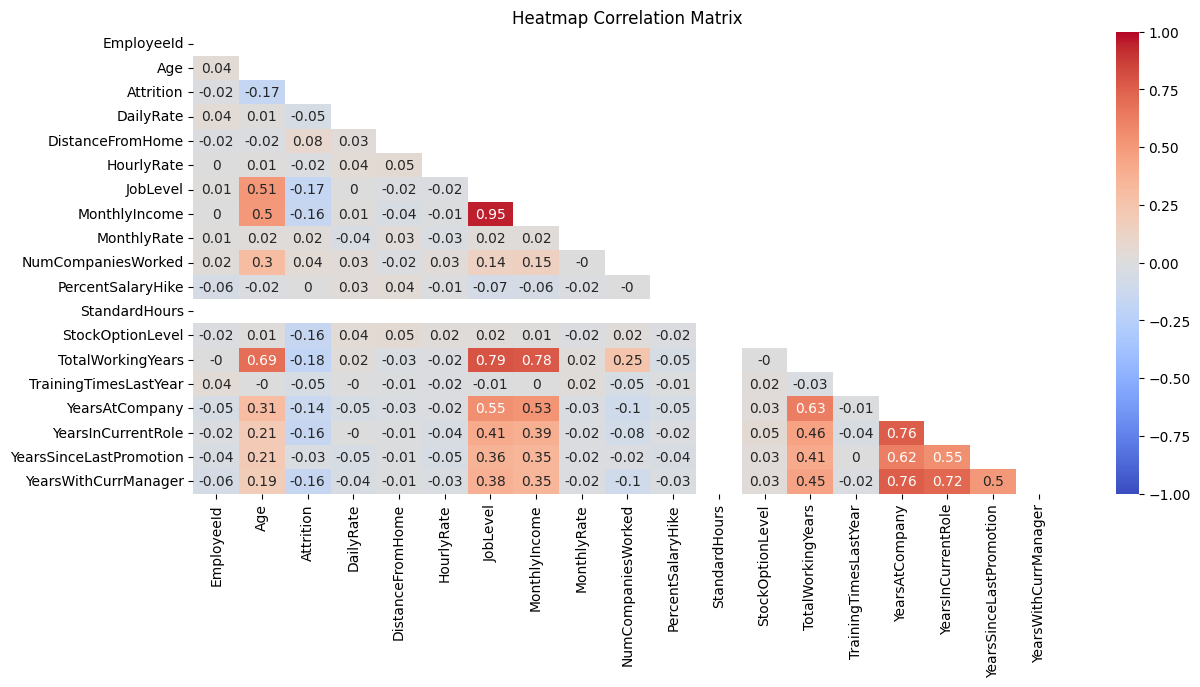

In [ ]:
plt.figure(figsize=(14, 6))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='coolwarm', mask=mask)
plt.title('Heatmap Correlation Matrix')
plt.show()

Based on the correlation matrix plot above, we can conclude:
1. `Age` has a fairly strong positive correlation with `TotalWorkingYears`, because as age increases, the total years of work are relatively longer.
2. `Age` has a fairly strong positive correlation with `JobLevel`, because as employees get older, employees will generally occupy a higher position in the company.
3. `Age` has a fairly strong positive correlation with `MonthlyIncome`, because as employees get older, employees will generally get a bigger income.
4. `JobLevel` has a very strong positive correlation with `MonthlyIncome`, because more senior employees tend to earn higher incomes.
5. `JobLevel` has a very strong positive correlation with `TotalWorkingYears`, because more senior employees generally have experience and have worked for a longer period of time.
6. `JobLevel` has a fairly strong positive correlation with `YeasAtCompany`, because more senior employees tend to have worked for many years in the same company.
7. `MonthlyIncome` has a very strong positive correlation with `TotalWorkingYears`, because the higher the income, the longer the total number of years of work.
8. `MonthlyIncome` has a fairly strong positive correlation with `YearsAtCompany`, because the higher the income, generally the longer employees have worked at the same company.
9. `TotalWorkingYears` has a fairly strong positive correlation with `YearsAtCompany`, because the longer the span of years of work, generally the longer employees have worked at the same company.
10. `YearsAtCompany` has a very strong positive correlation with `YearsInCurrentRole`.
11. `YearsAtCompany` has a very strong positive correlation with `YearsWithCurrentManager`.
12. `YearsAtCompany` has a fairly strong positive correlation with `YearsSinceLastPromotion`.
13. `YearsInCurrentRole` has a very strong positive correlation with `YearsWithCurrentManager`.
14. `YearsInCurrentRole` has a fairly strong positive correlation with `YearsSinceLastPromotion`.
15. `YearsSinceLastPromotion` has a fairly strong positive correlation with `YearsWithCurrentManager`.

## **2.2 Univariate Analysis**

In [ ]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

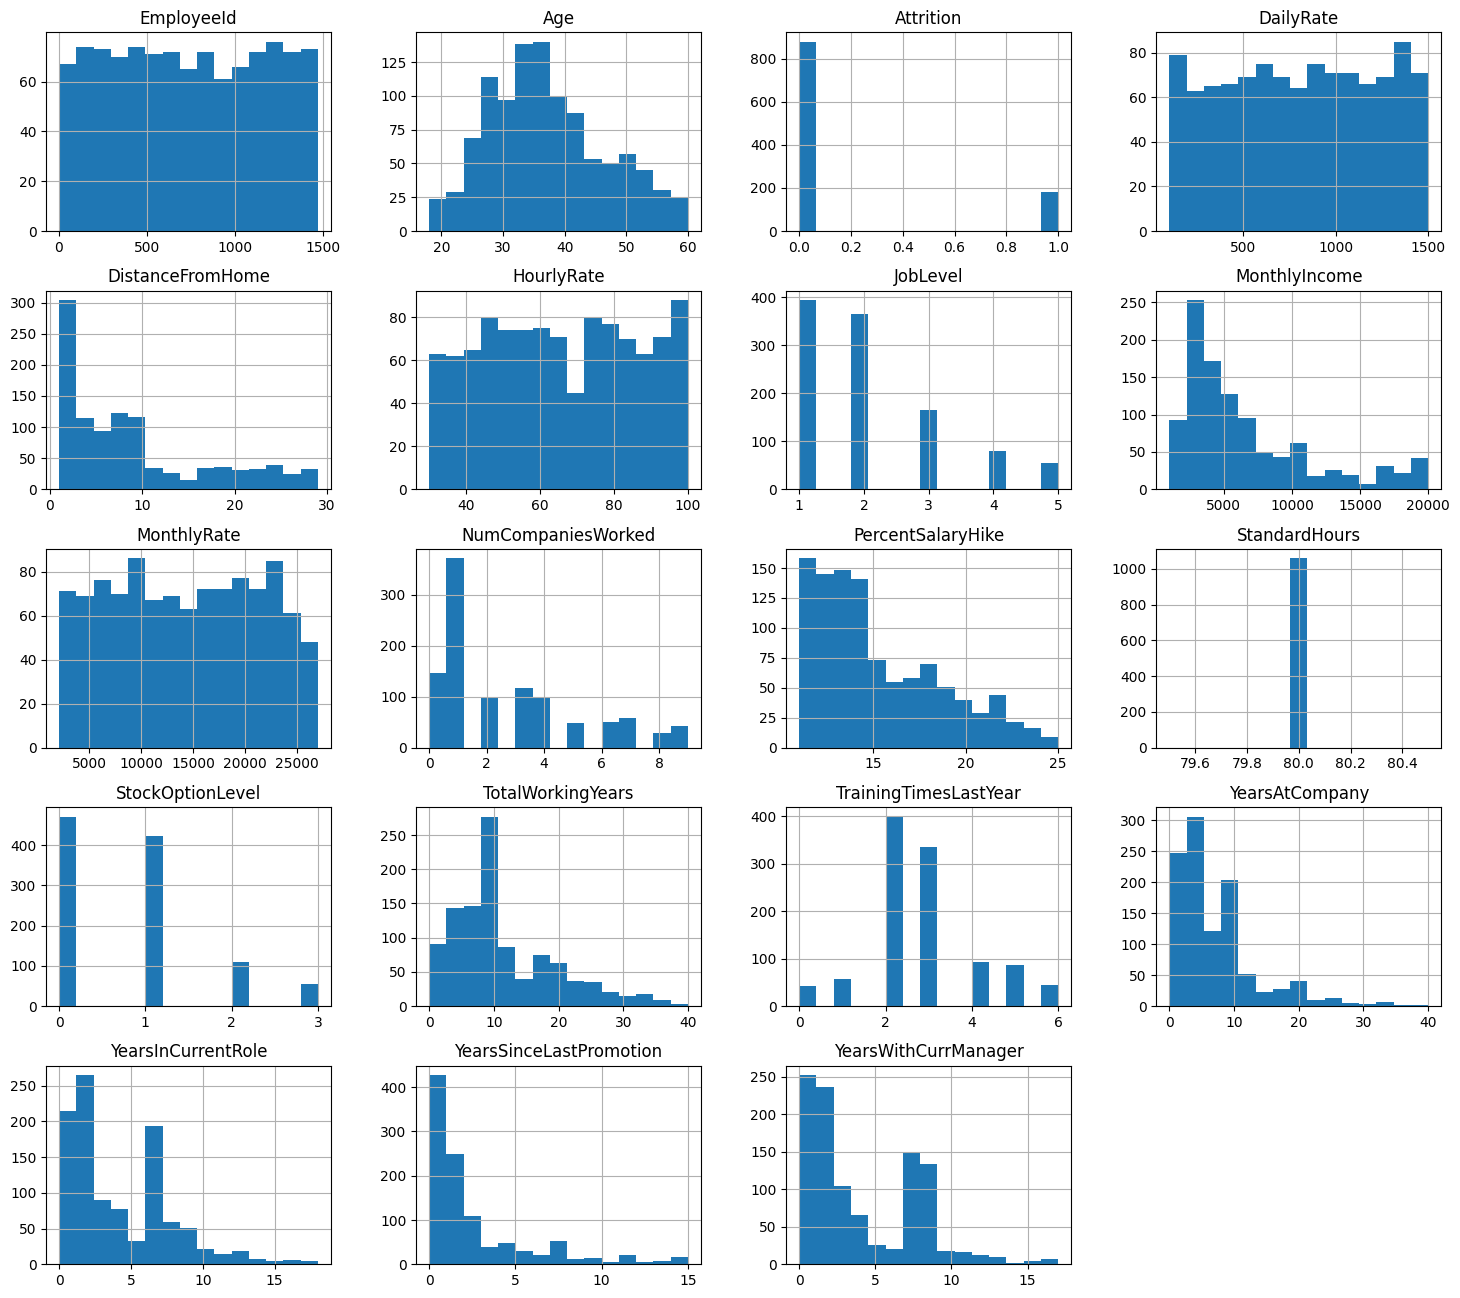

In [ ]:
# @title ### 2.2.1 Numerical Univariate Analysis
df[numerical].hist(bins=15, figsize=(18, 16))
plt.show()

Based on the graph above, we can see that there are several numeric features that are in the form of right-skewed distribution, such as DistanceFromHome, MonhtlyIncome, NumCompaniesWorked, PercentageSalaryHike, TotalWorkingYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. On the other hand, the Age and TrainingTimeLastYear features are classified as normal distribution.

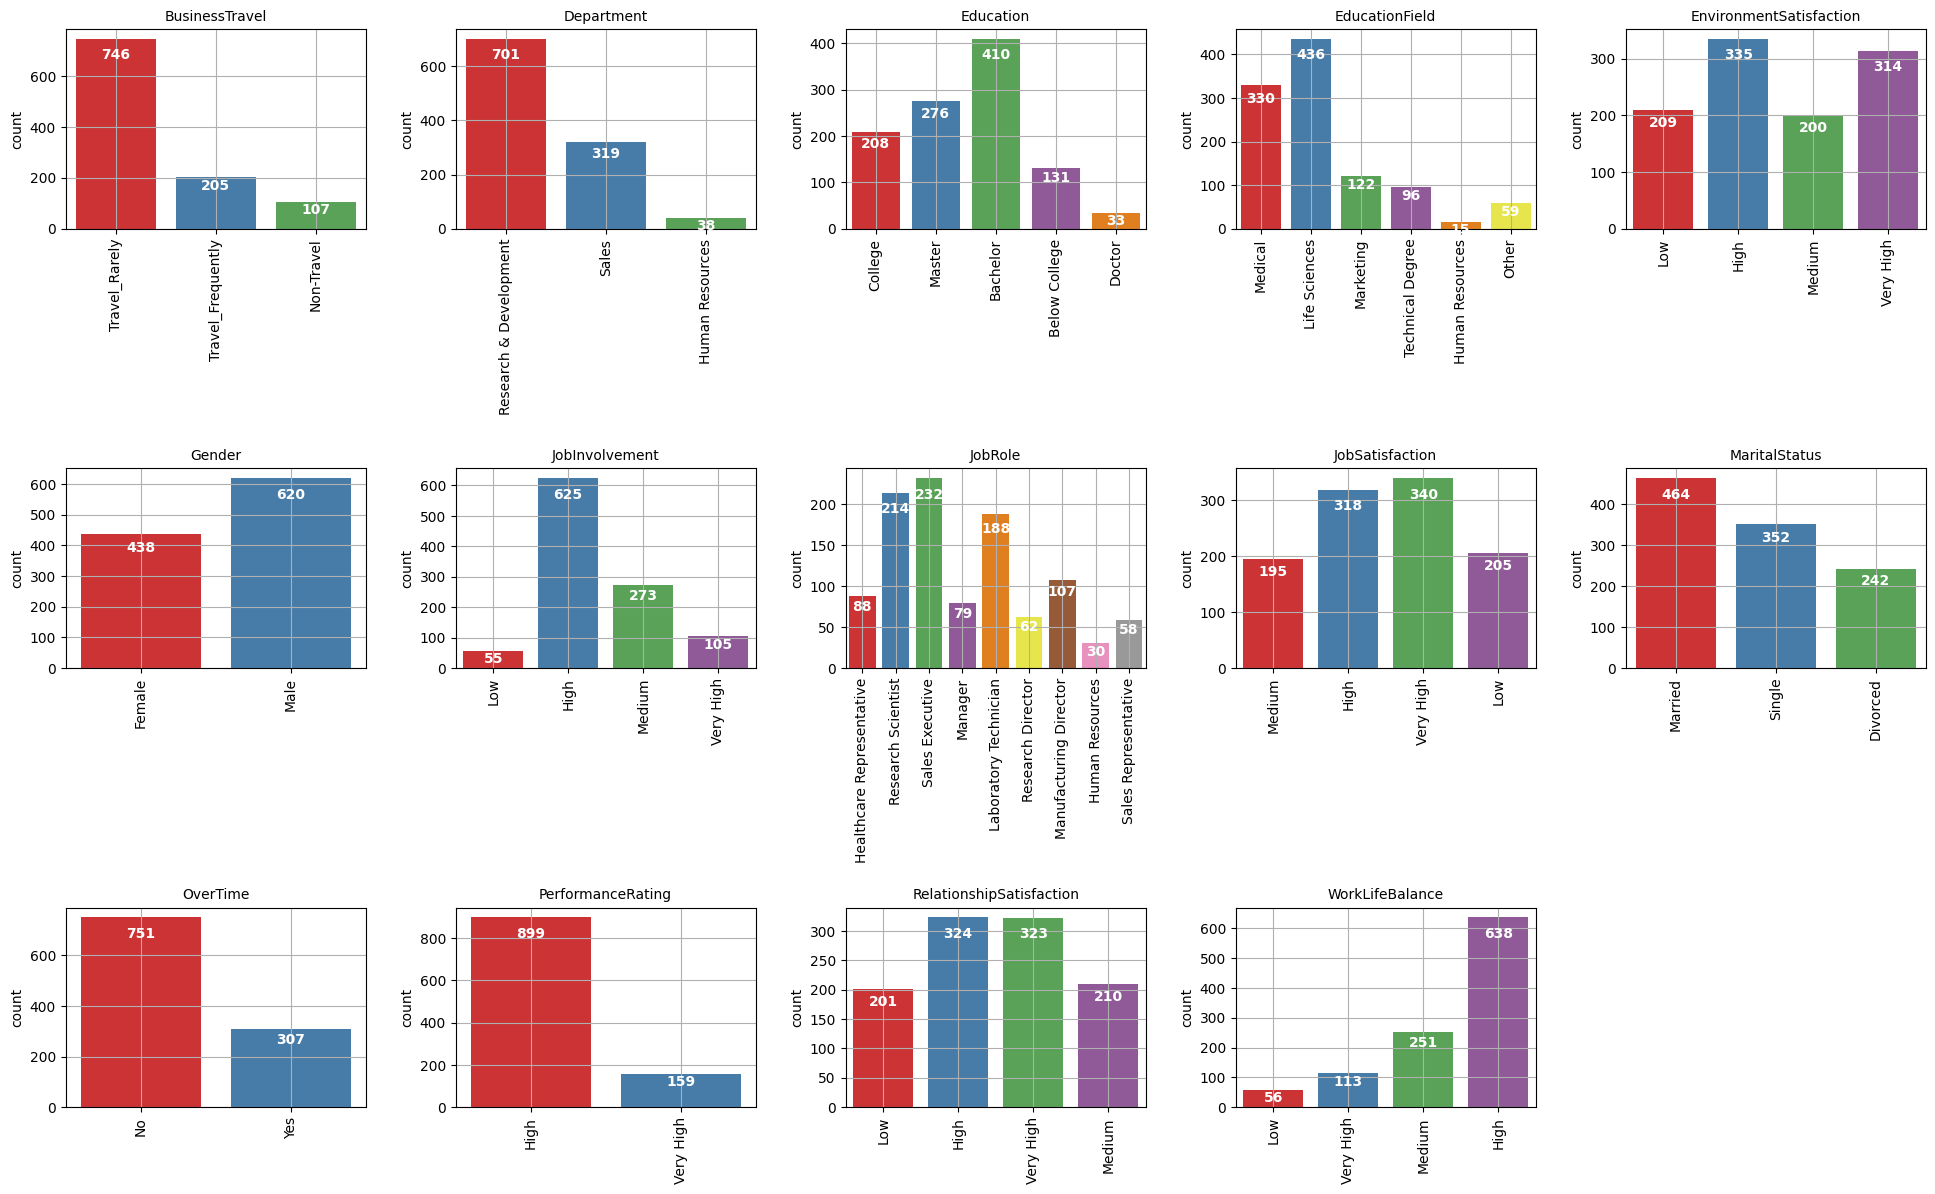

In [ ]:
# @title ### 2.2.2 Categorical Univariate Analysis
fig, ax = plt.subplots(3, 5, figsize=(24, 14))
for i, feature in enumerate(categorical):
    # Get the row and column index for each subplot
    row = i // 5
    col = i % 5
    sns.countplot(data=df, x=feature, ax=ax[row, col], hue=feature, palette='Set1')
    ax[row, col].set_title(feature, fontsize=10)
    ax[row, col].set_xlabel('')
    ax[row, col].grid()

    # Give count label each bar
    for bar in ax[row, col].patches:
        ax[row, col].annotate(
            str(int(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2, bar.get_height() - (bar.get_height() * 0.05)),
            ha='center', va='top', fontsize=10, color='white', weight='bold')

    # Rotate the x labels
    for label in ax[row, col].get_xticklabels():
        label.set_rotation(90)

# Hide unused subplots if number of features < 16
for j in range(len(categorical), 15):
    fig.delaxes(ax[j // 5, j % 5])

plt.subplots_adjust(hspace=1.2, wspace=0.3)
plt.show()

***Based on the graph above it can be concluded that:***
- The number of male employees is greater than female employees
- The largest number of employees comes from the Research & Development department.
- Many employees have an educational background as a bachelor.
- Most employees come from the field of life science education
- Most employees have a job role as a sales executive
- The number of employees who do not work overtime is greater than the number of employees who do not work overtime.
- Most employees who do not often travel on business (Travel Rarely)
- Most employees have a married status
- Generally employees have high satisfaction with the work environment, high work relations, are very involved in work and have high work performance
- Most employees have a very good work-life balance

## **2.3 Multivariate Analysis**

In [ ]:
# @title ### 2.3.1 Numerical Multivariate Analysis
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))
    for i, feature in enumerate(features):
        row = i // 2
        col = i % 2
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[row, col], showfliers=showfliers)
            ax[row, col].set_title(f'{feature} Distribution Plot')

        ax[row, col].set_ylabel(None)
        ax[row, col].grid(color='lightgray')

    plt.tight_layout()
    plt.show()

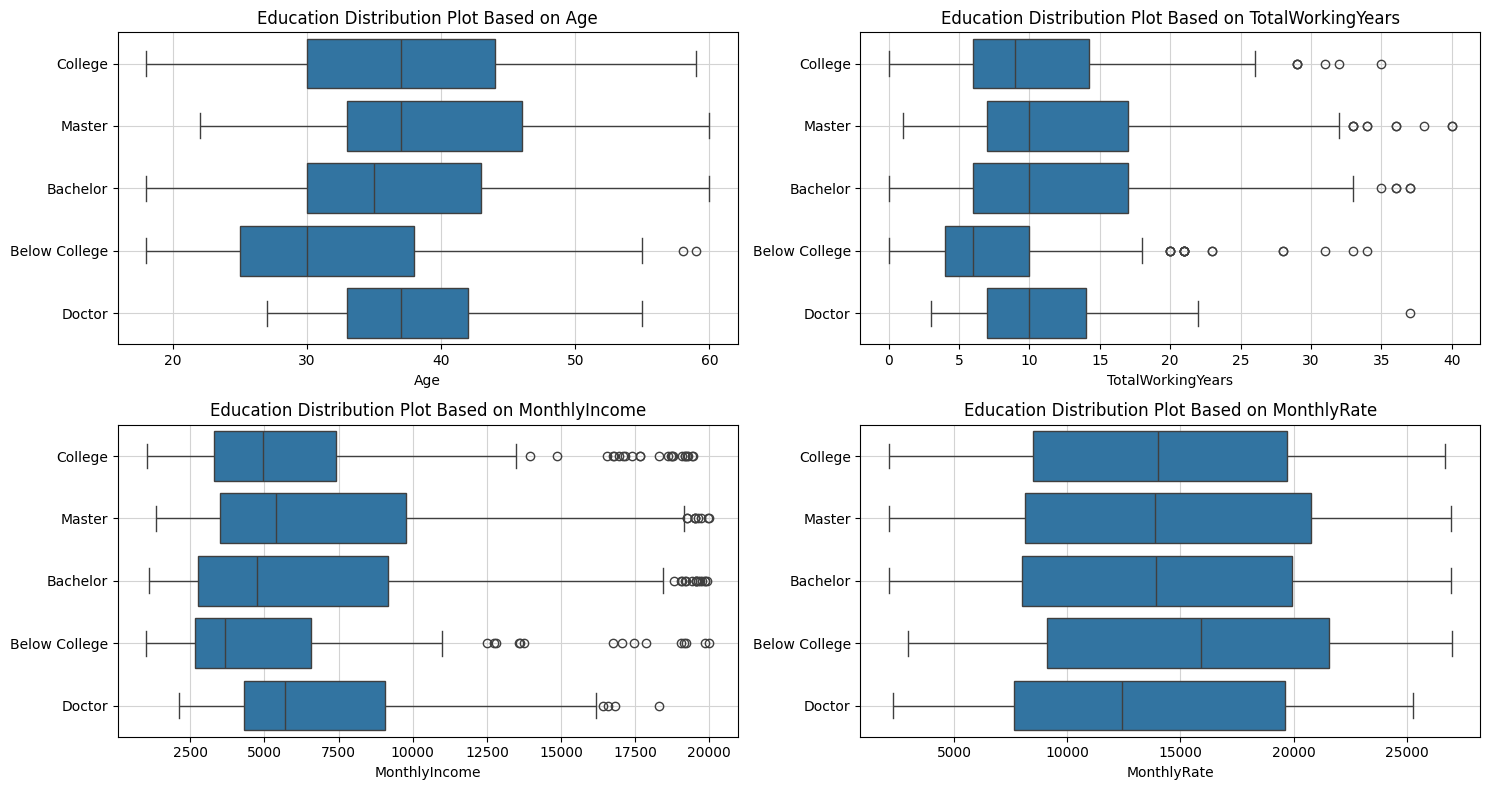

In [ ]:
numerical_dis_plot(
    features=['Age', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyRate'],
    df=df,
    segment_feature='Education'
)

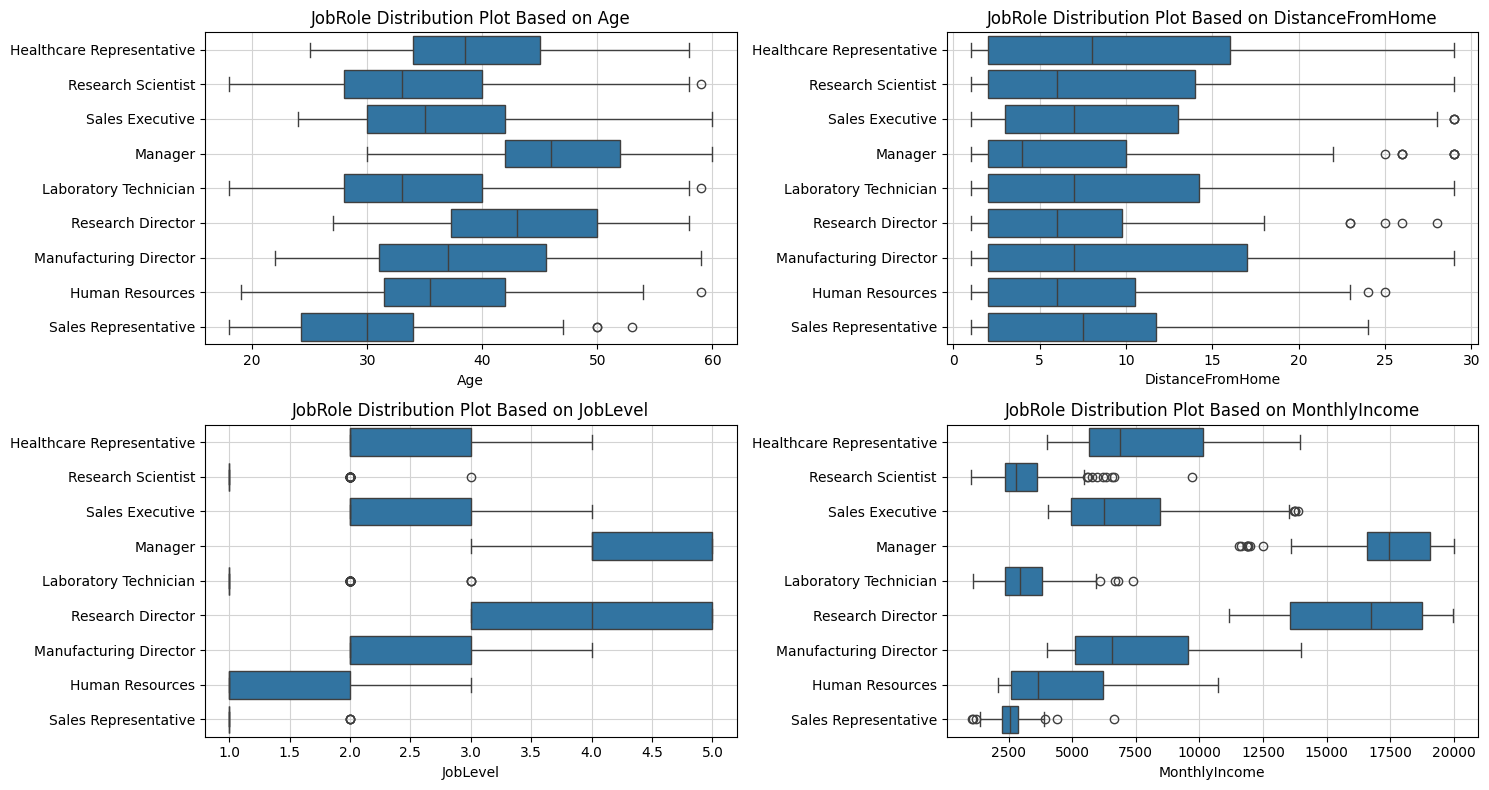

In [ ]:
numerical_dis_plot(
    features=['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome'],
    df=df,
    segment_feature='JobRole'
)

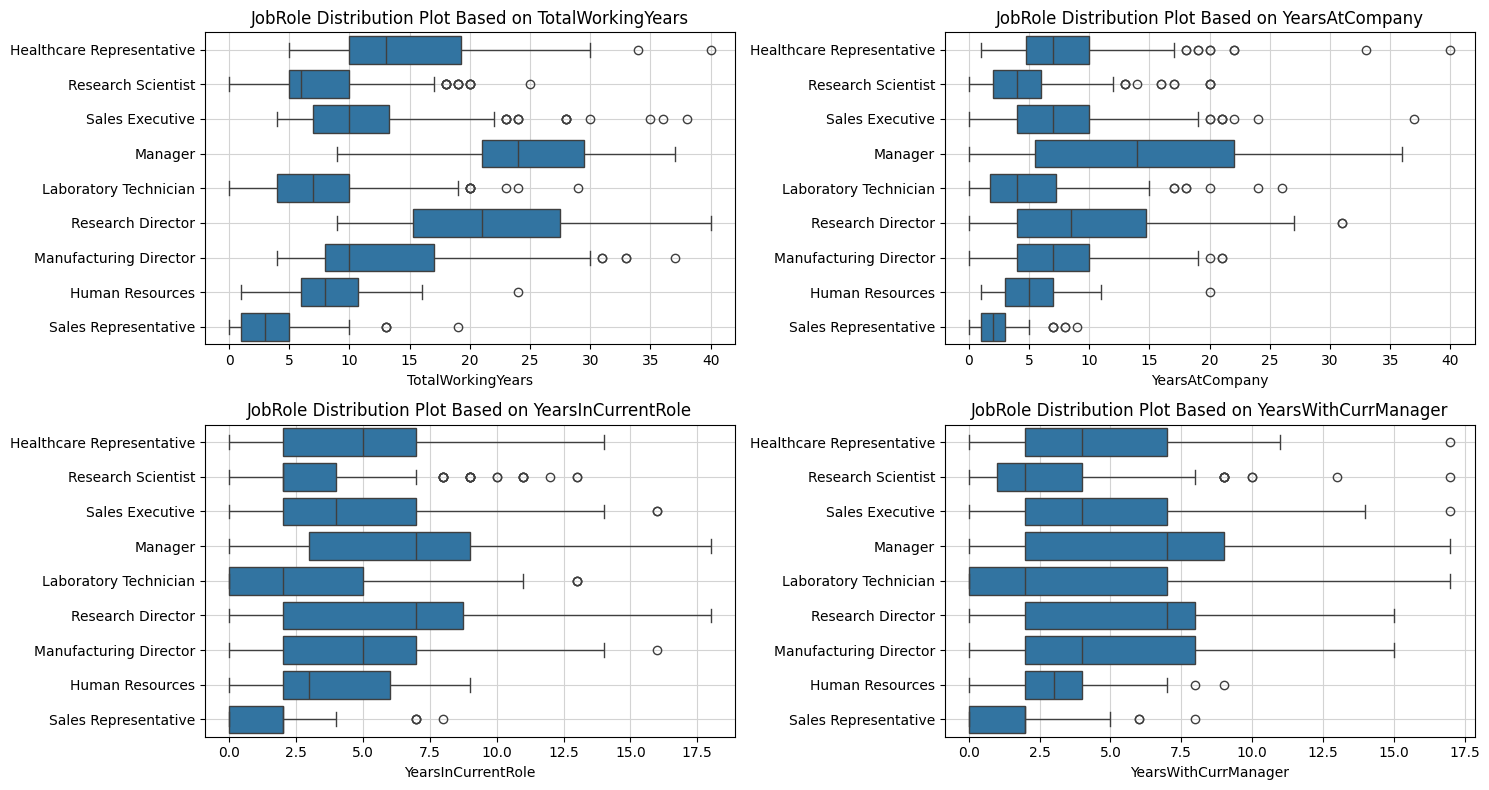

In [ ]:
numerical_dis_plot(
    features=['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
    df=df,
    segment_feature='JobRole'
)

In [ ]:
# @title ### 2.3.2 Categorical Multivariate Analysis
def categorical_dis_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 18))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'{segment_feature} Distribution Plot Based on {feature}')
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
            ax[i].set_title(f'{feature} Distribution Plot')

        for bar in ax[i].patches:
            ax[i].annotate(
                str(int(bar.get_height())),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

        ax[i].set_ylabel(None)
        ax[i].grid(True, color='lightgray')

    plt.tight_layout()
    plt.show()

Distribution of categorical features by Job Role

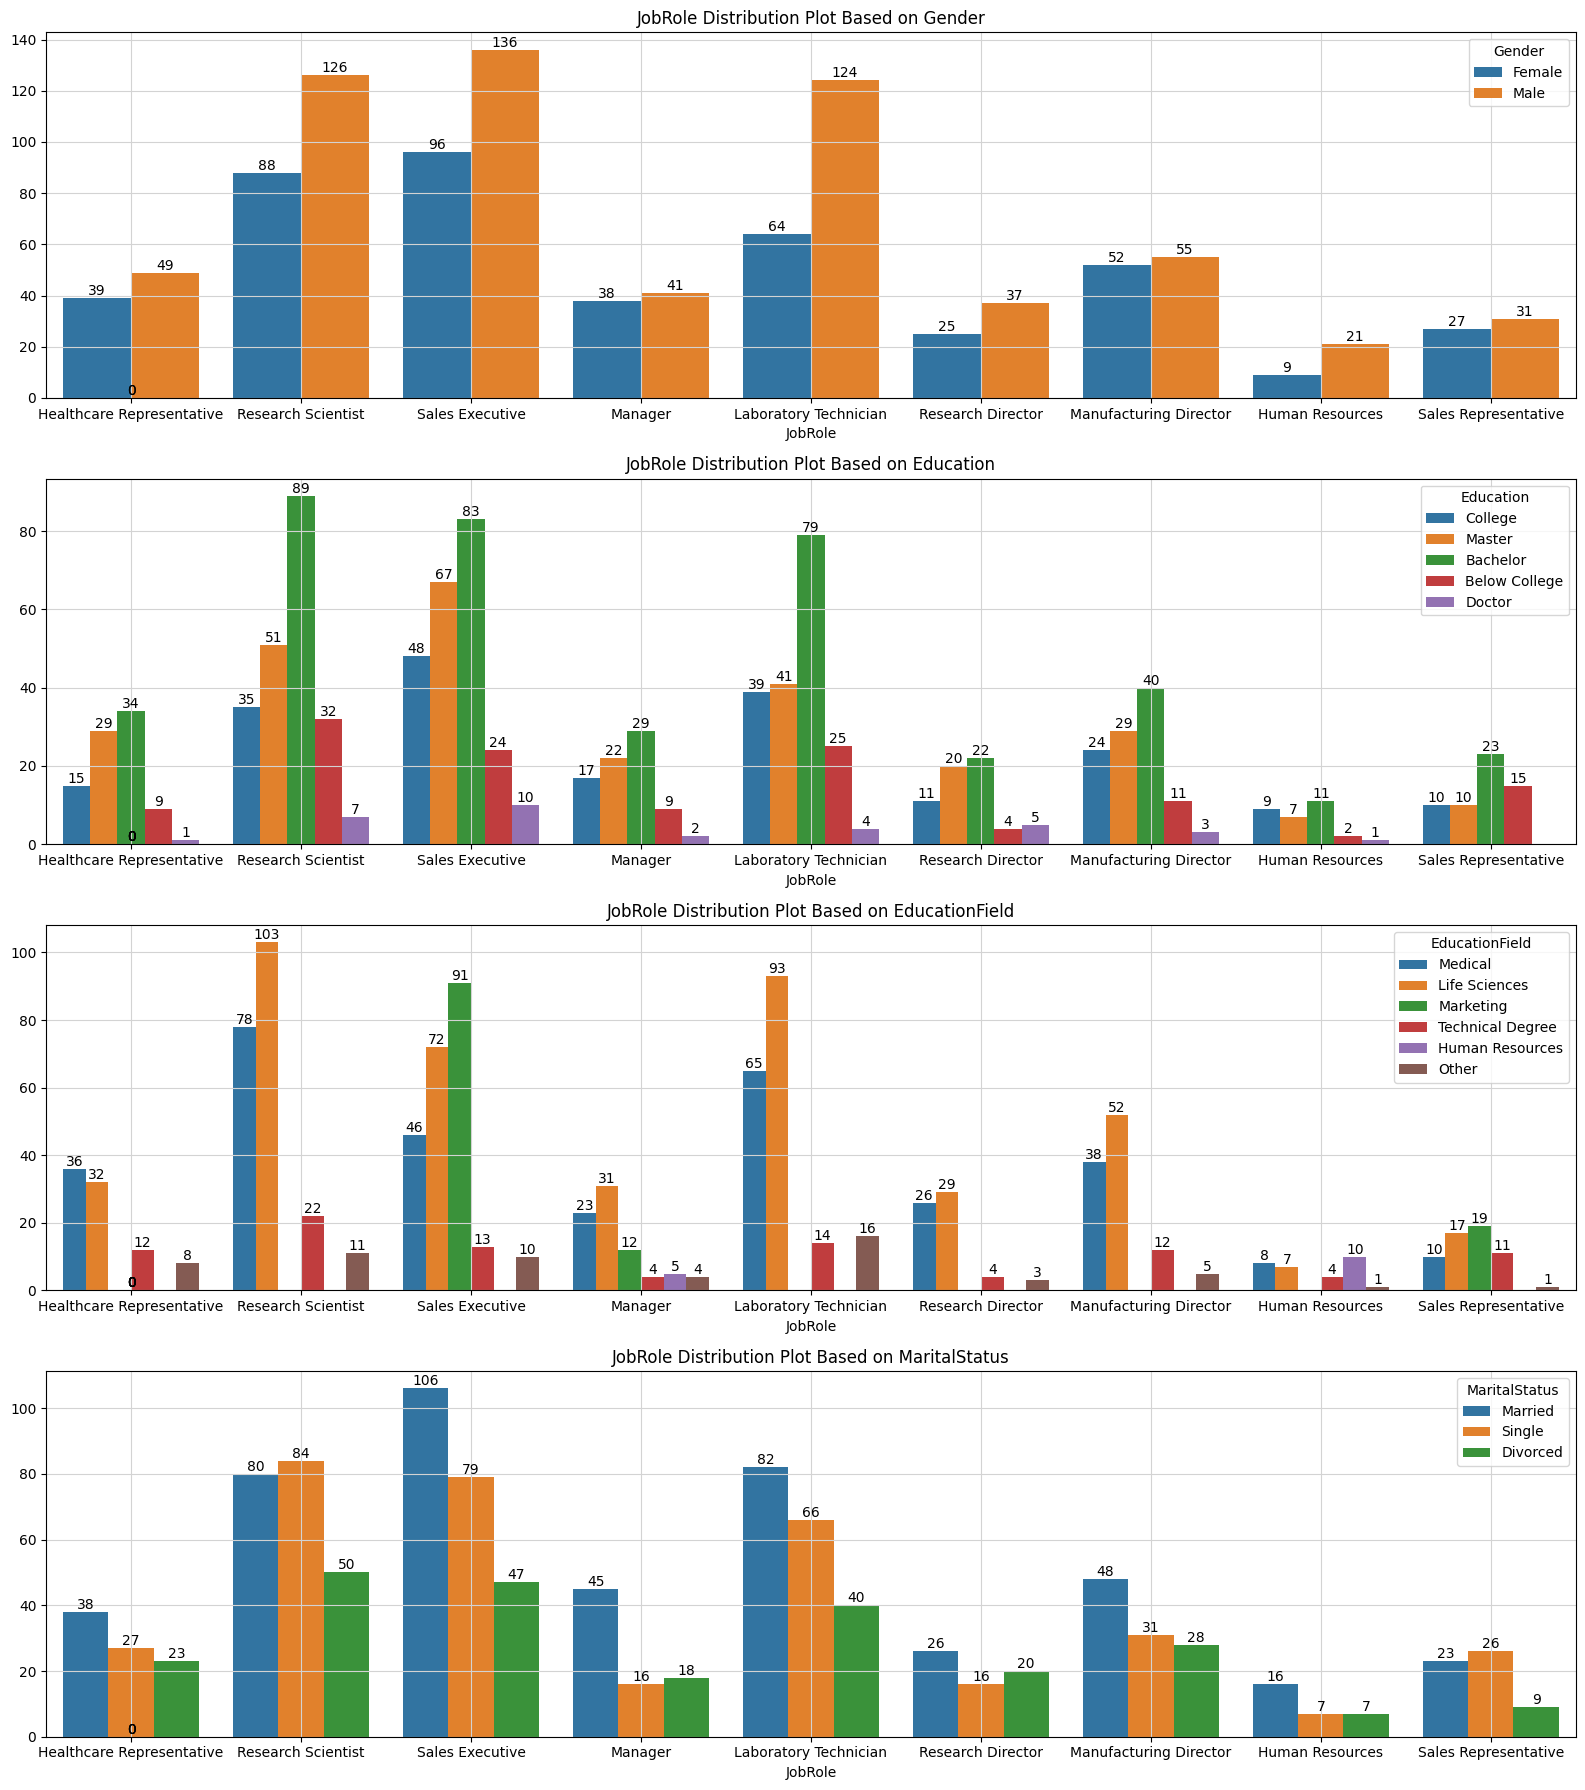

In [ ]:
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=df,
    segment_feature='JobRole'
)

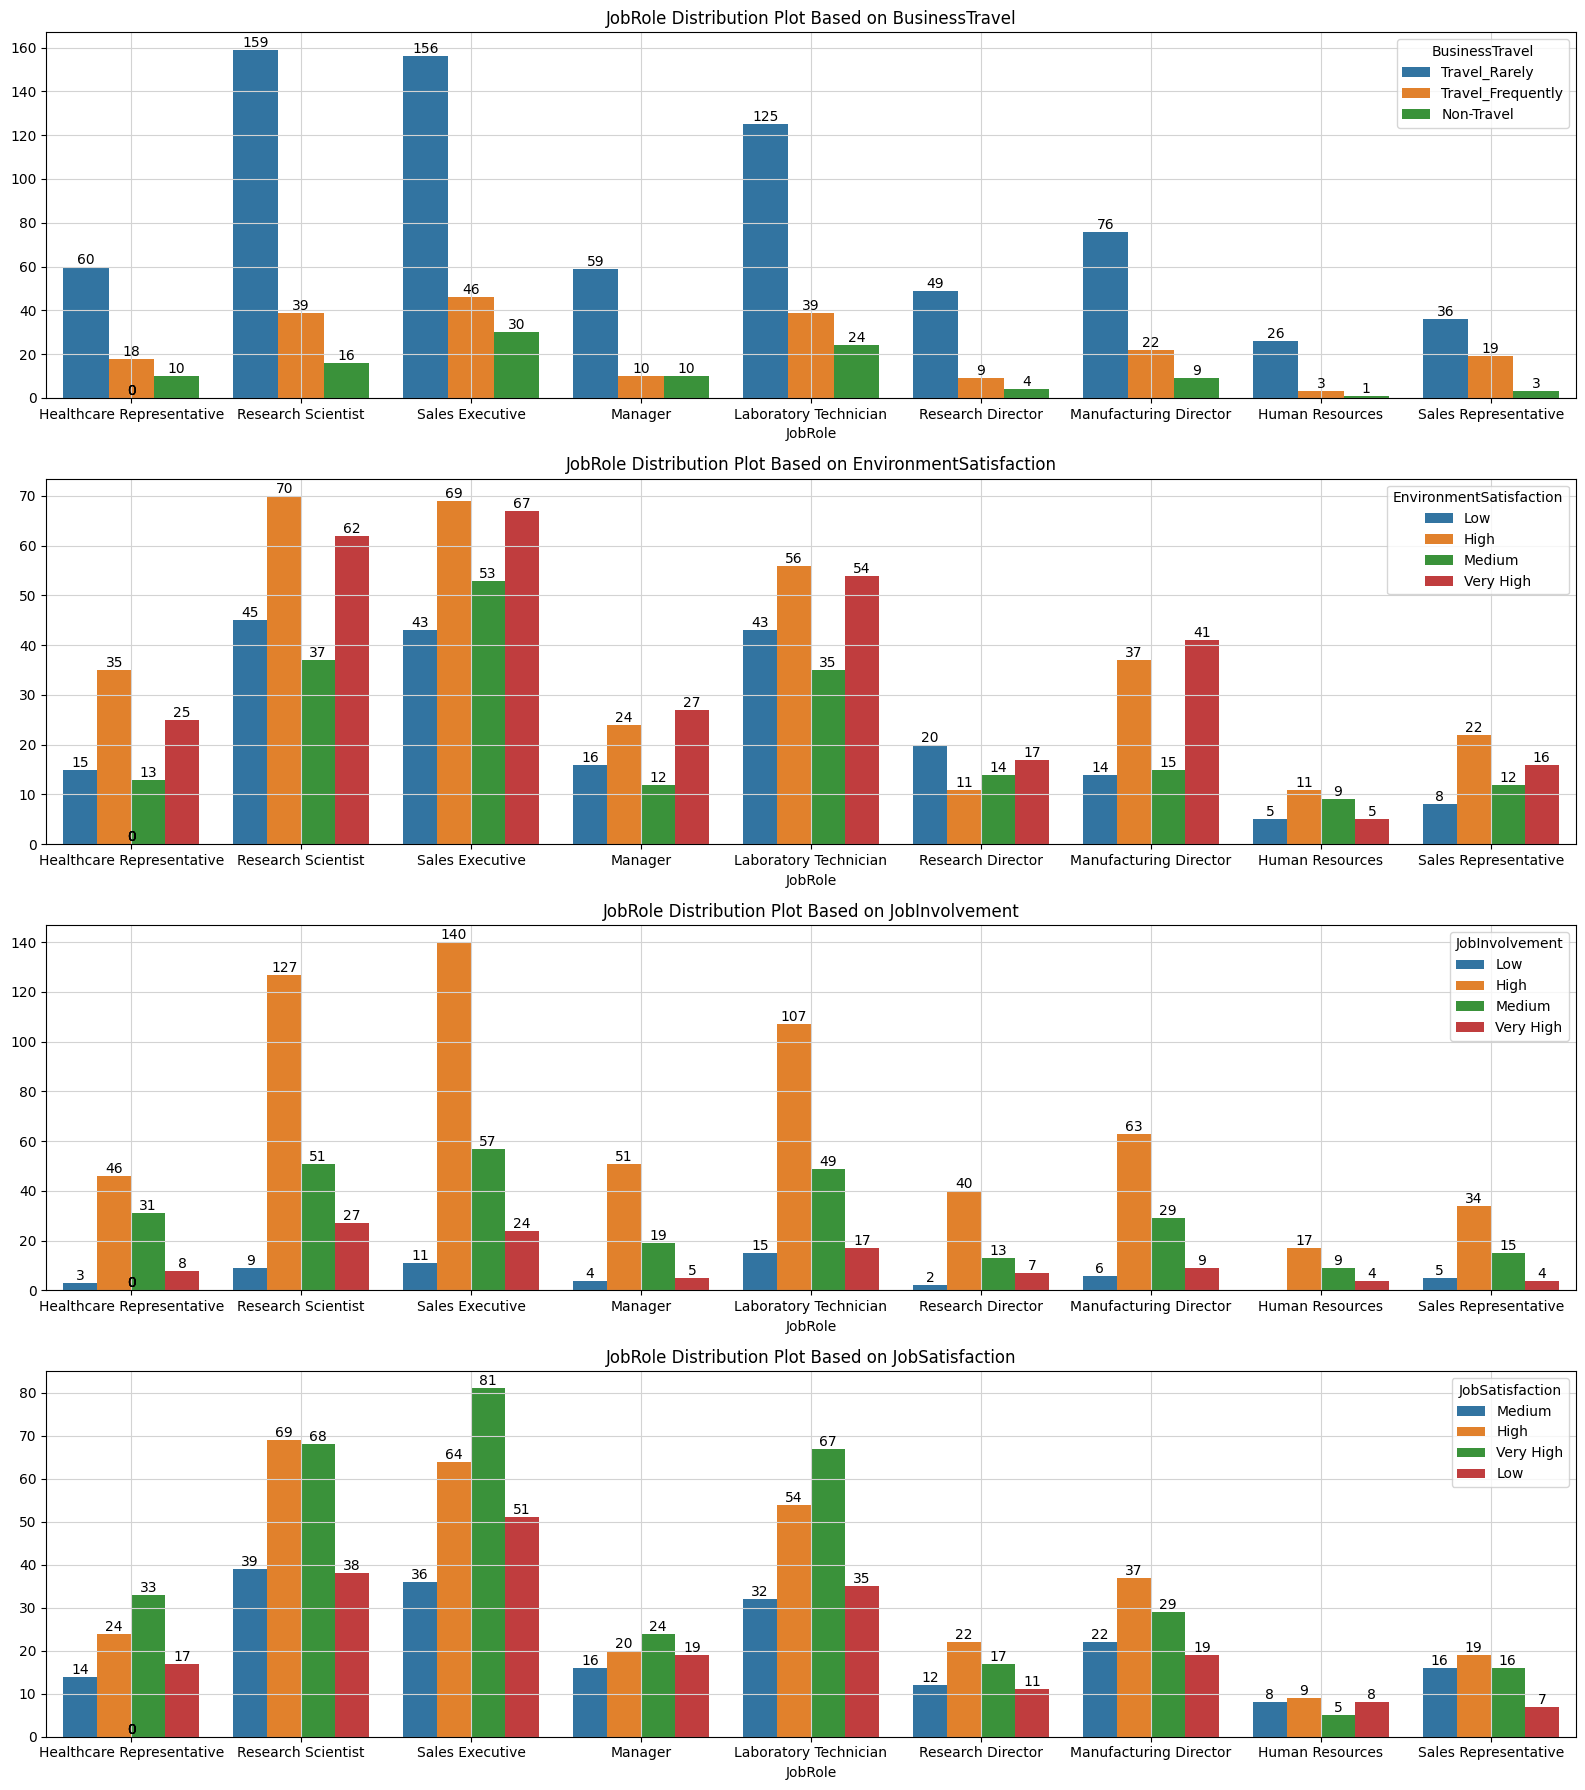

In [ ]:
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=df,
    segment_feature='JobRole'
)

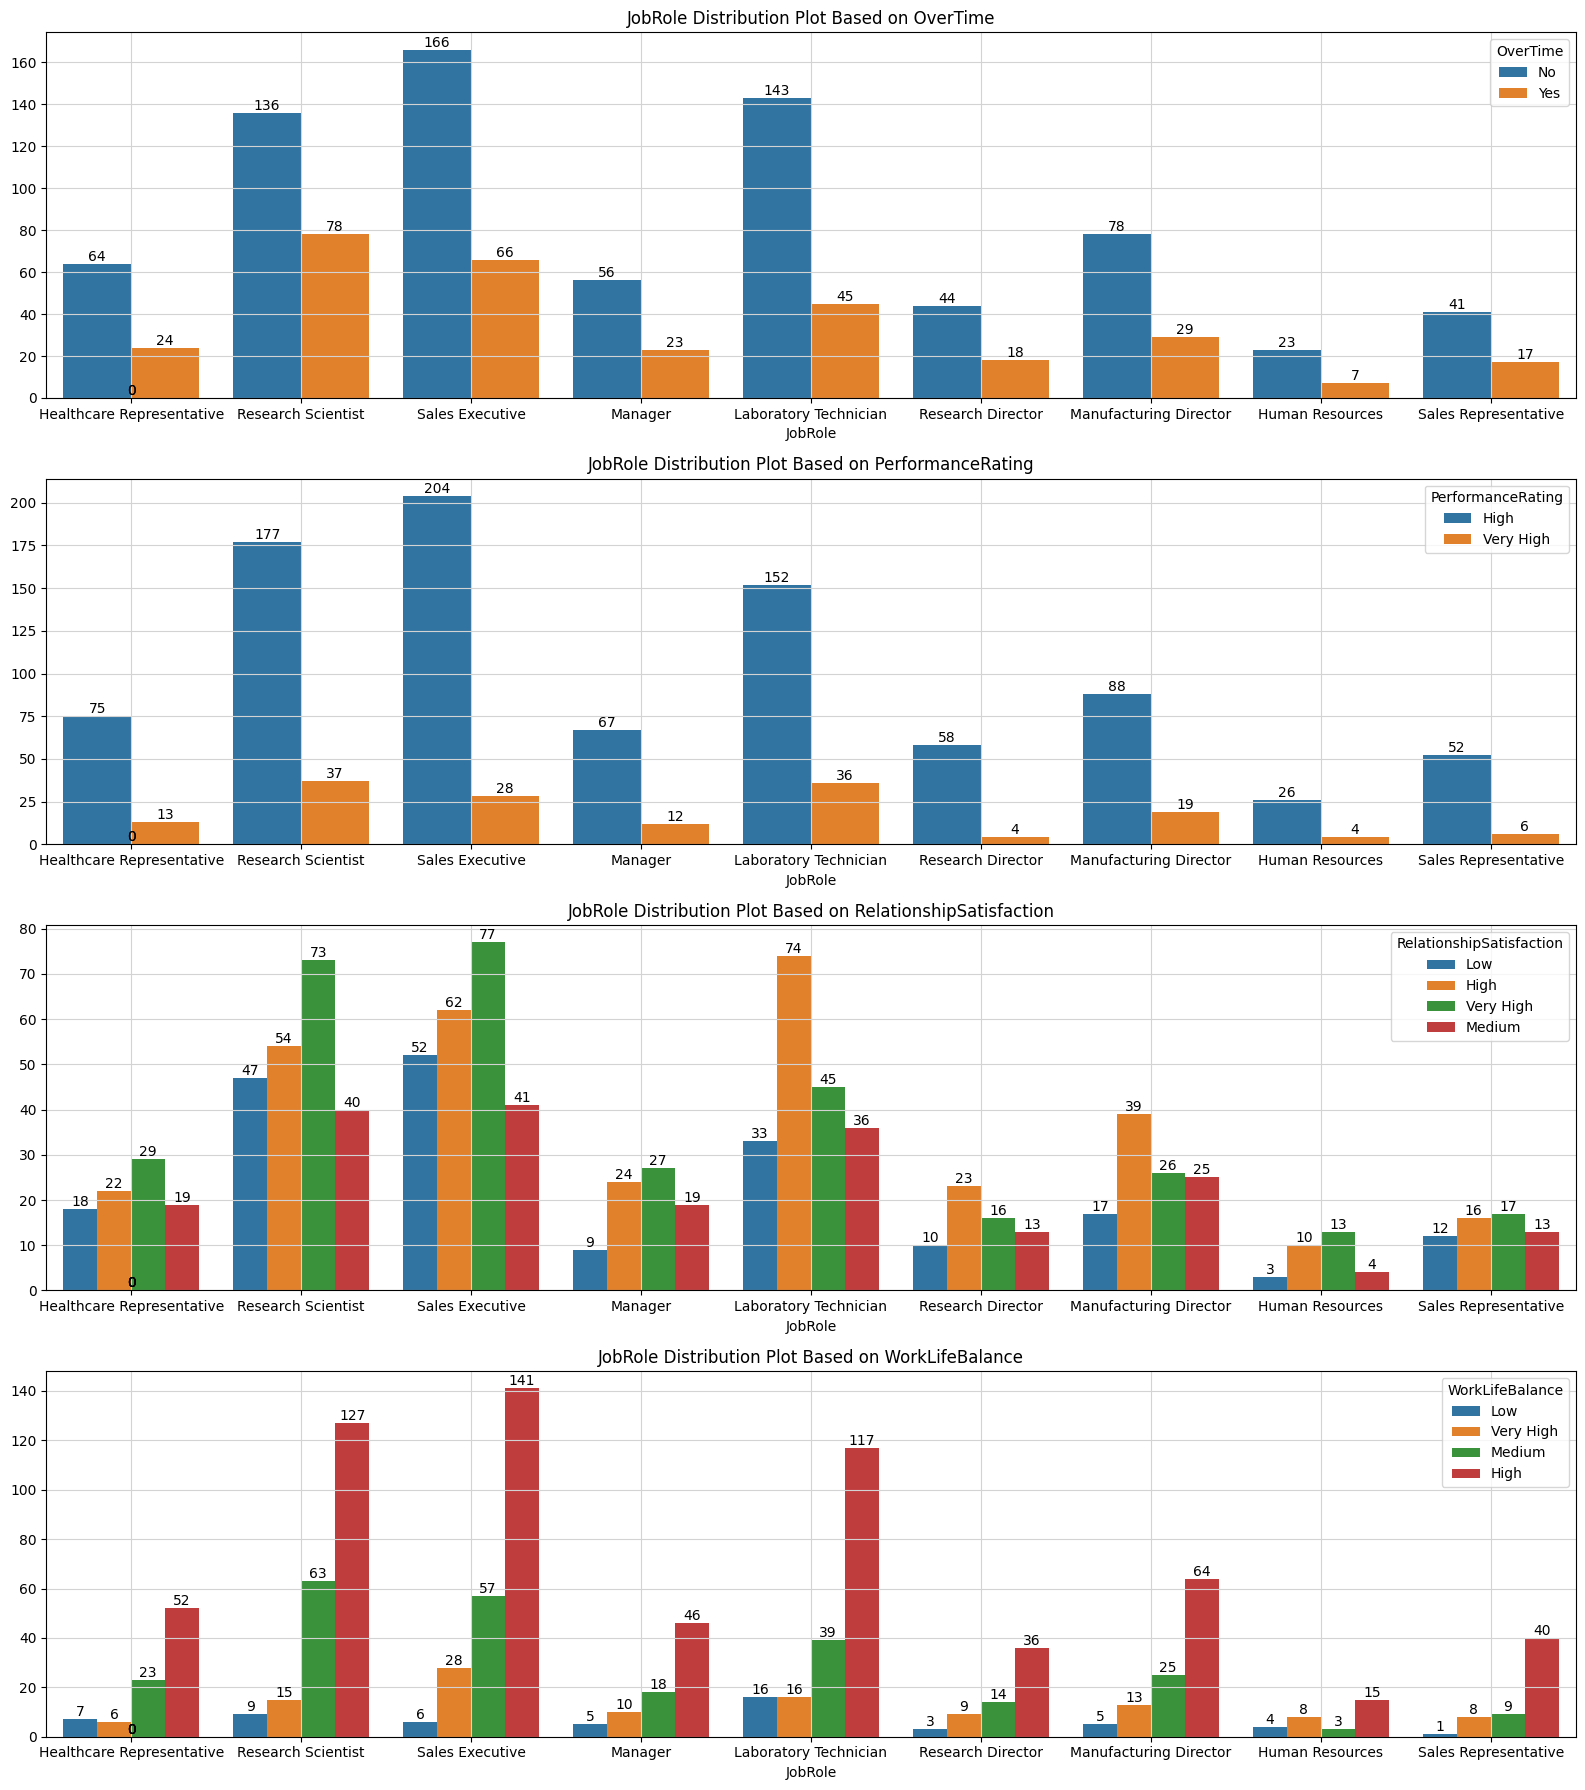

In [ ]:
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=df,
    segment_feature='JobRole'
)

Distribution of categorical features by Department

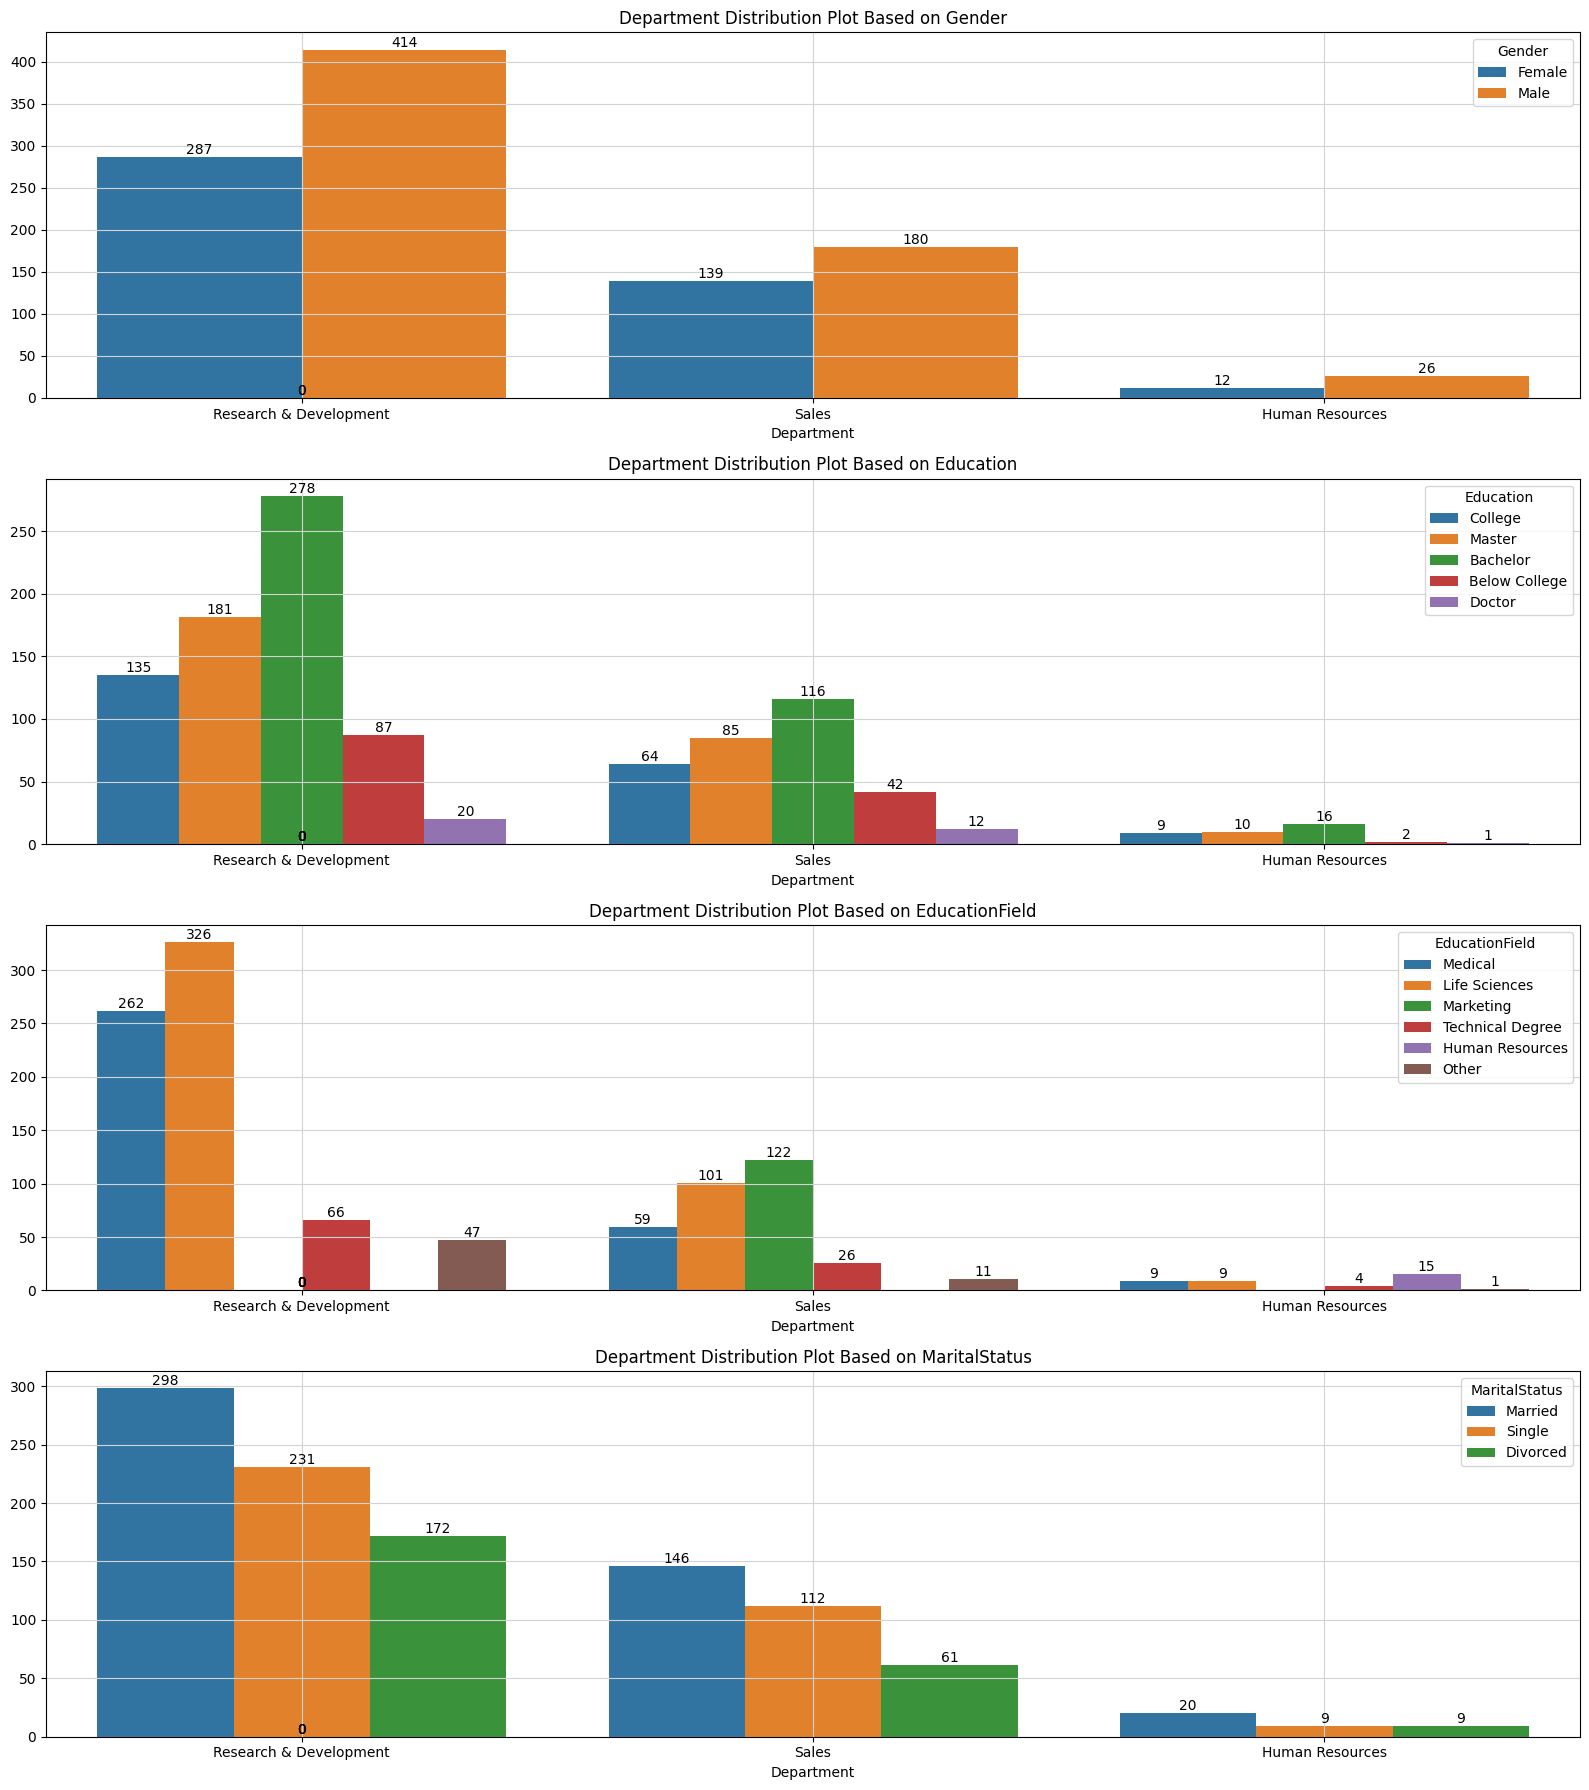

In [ ]:
categorical_dis_plot(
    features=['Gender', 'Education', 'EducationField', 'MaritalStatus'],
    df=df,
    segment_feature='Department'
)

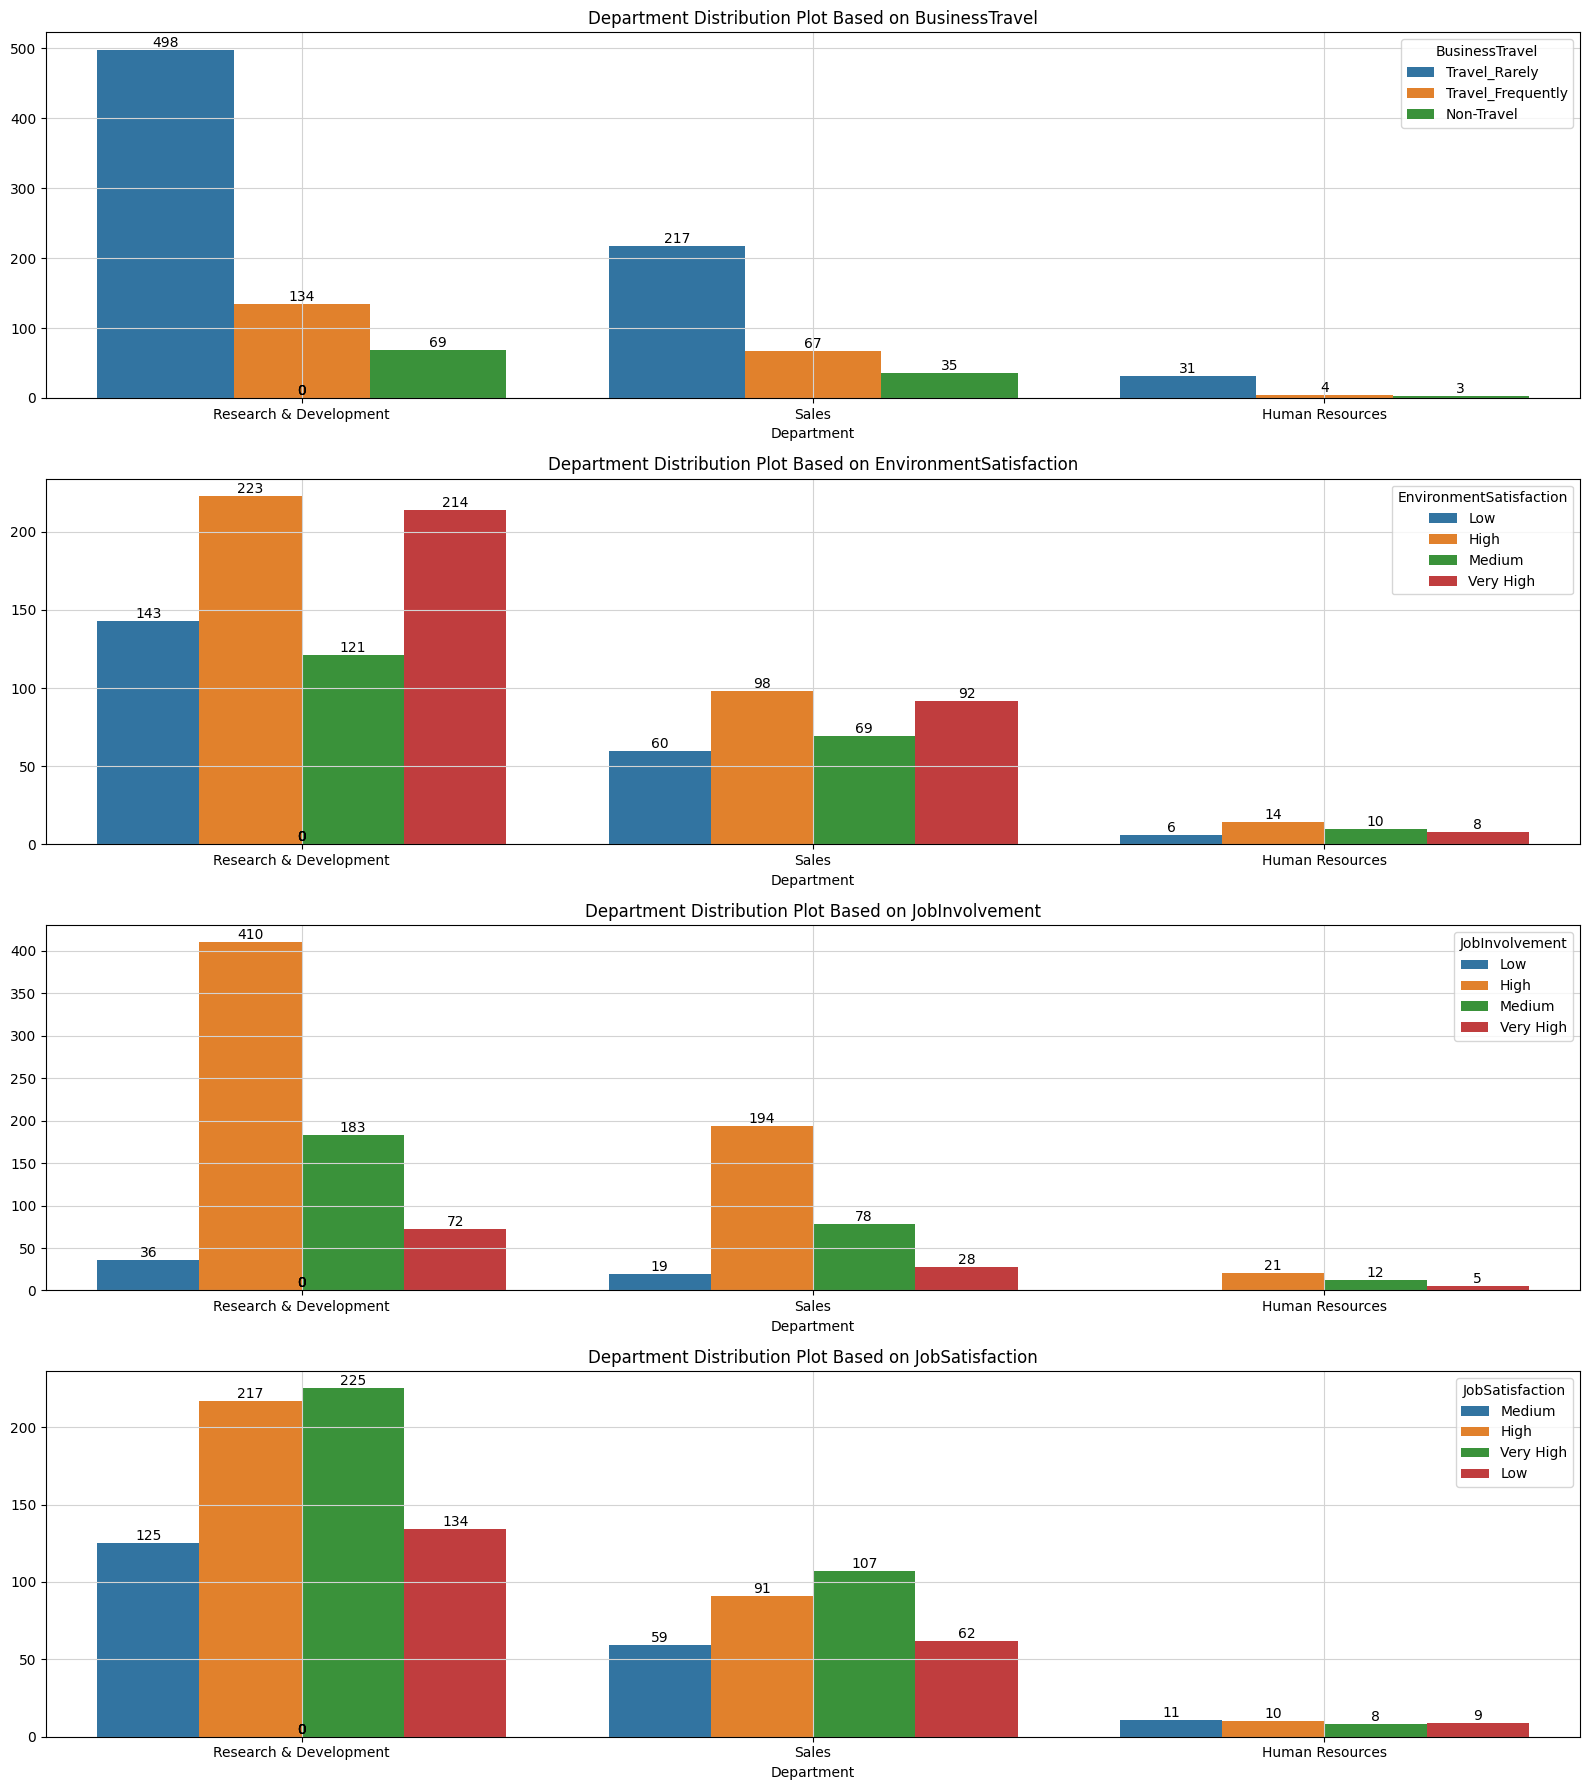

In [ ]:
categorical_dis_plot(
    features=['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction'],
    df=df,
    segment_feature='Department'
)

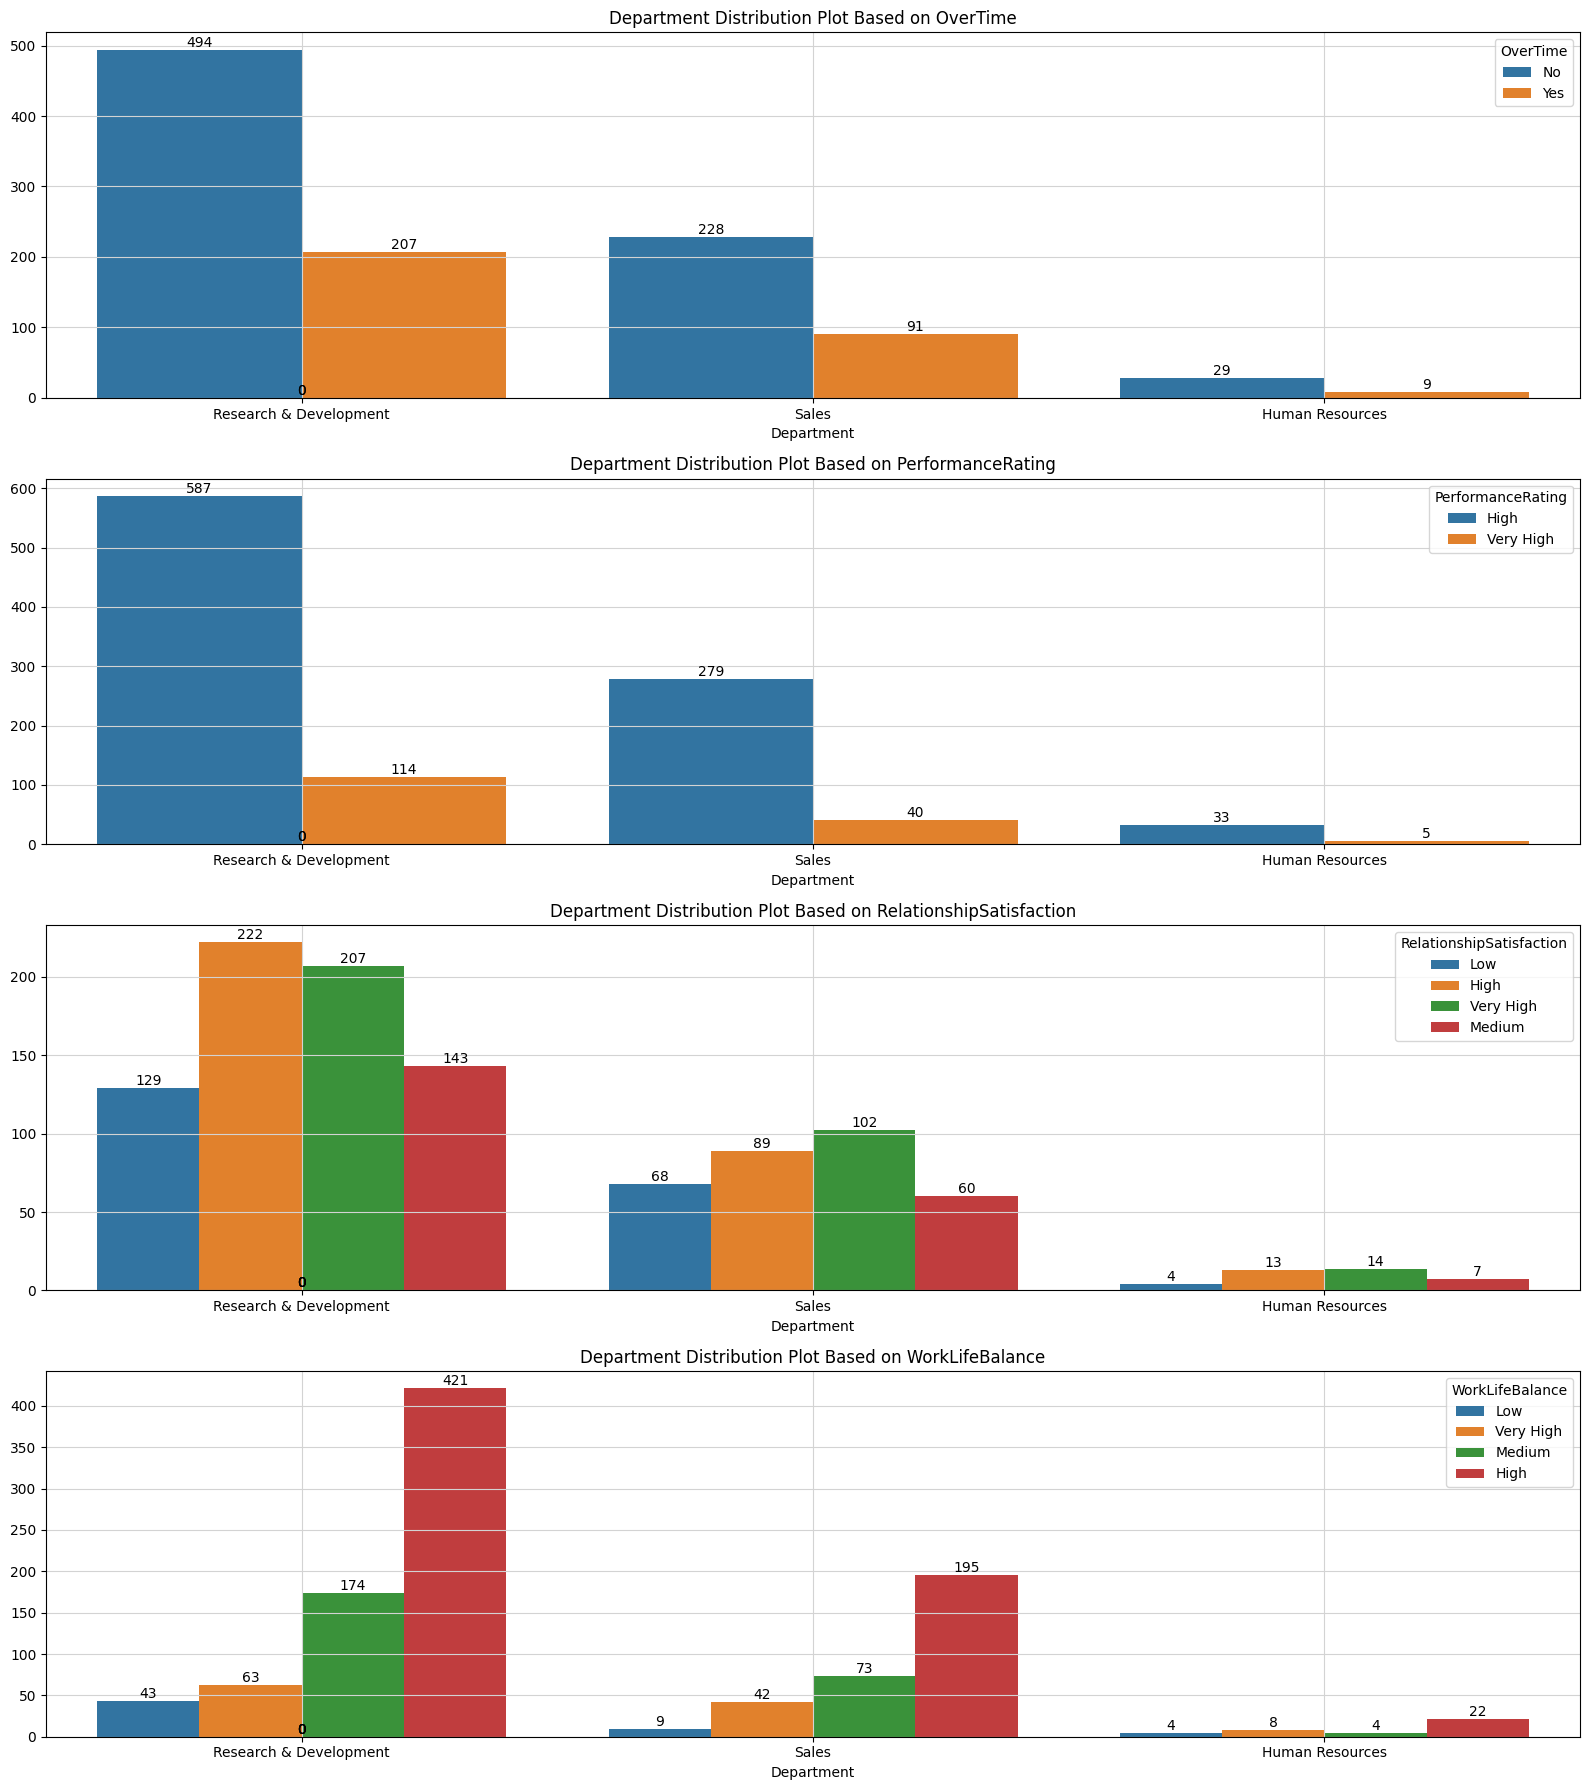

In [ ]:
categorical_dis_plot(
    features=['OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=df,
    segment_feature='Department'
)

### 2.3.3 Comparison of Attrition Features

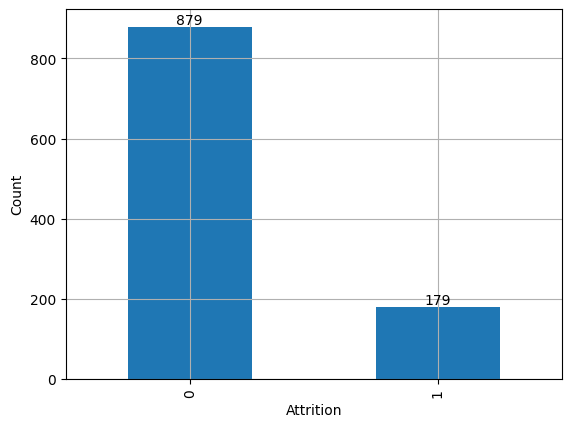

In [ ]:
ax = df['Attrition'].value_counts().plot(kind='bar')
ax.grid()
ax.set_ylabel('Count')

for bar in ax.patches:
    ax.annotate(str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)

Based on the Attrition plot above, the number of employees who did not perform attrition (`0`) was greater than those who perform attrition (`1`), so it can be concluded that the data is not balanced or imbalanced data condition.

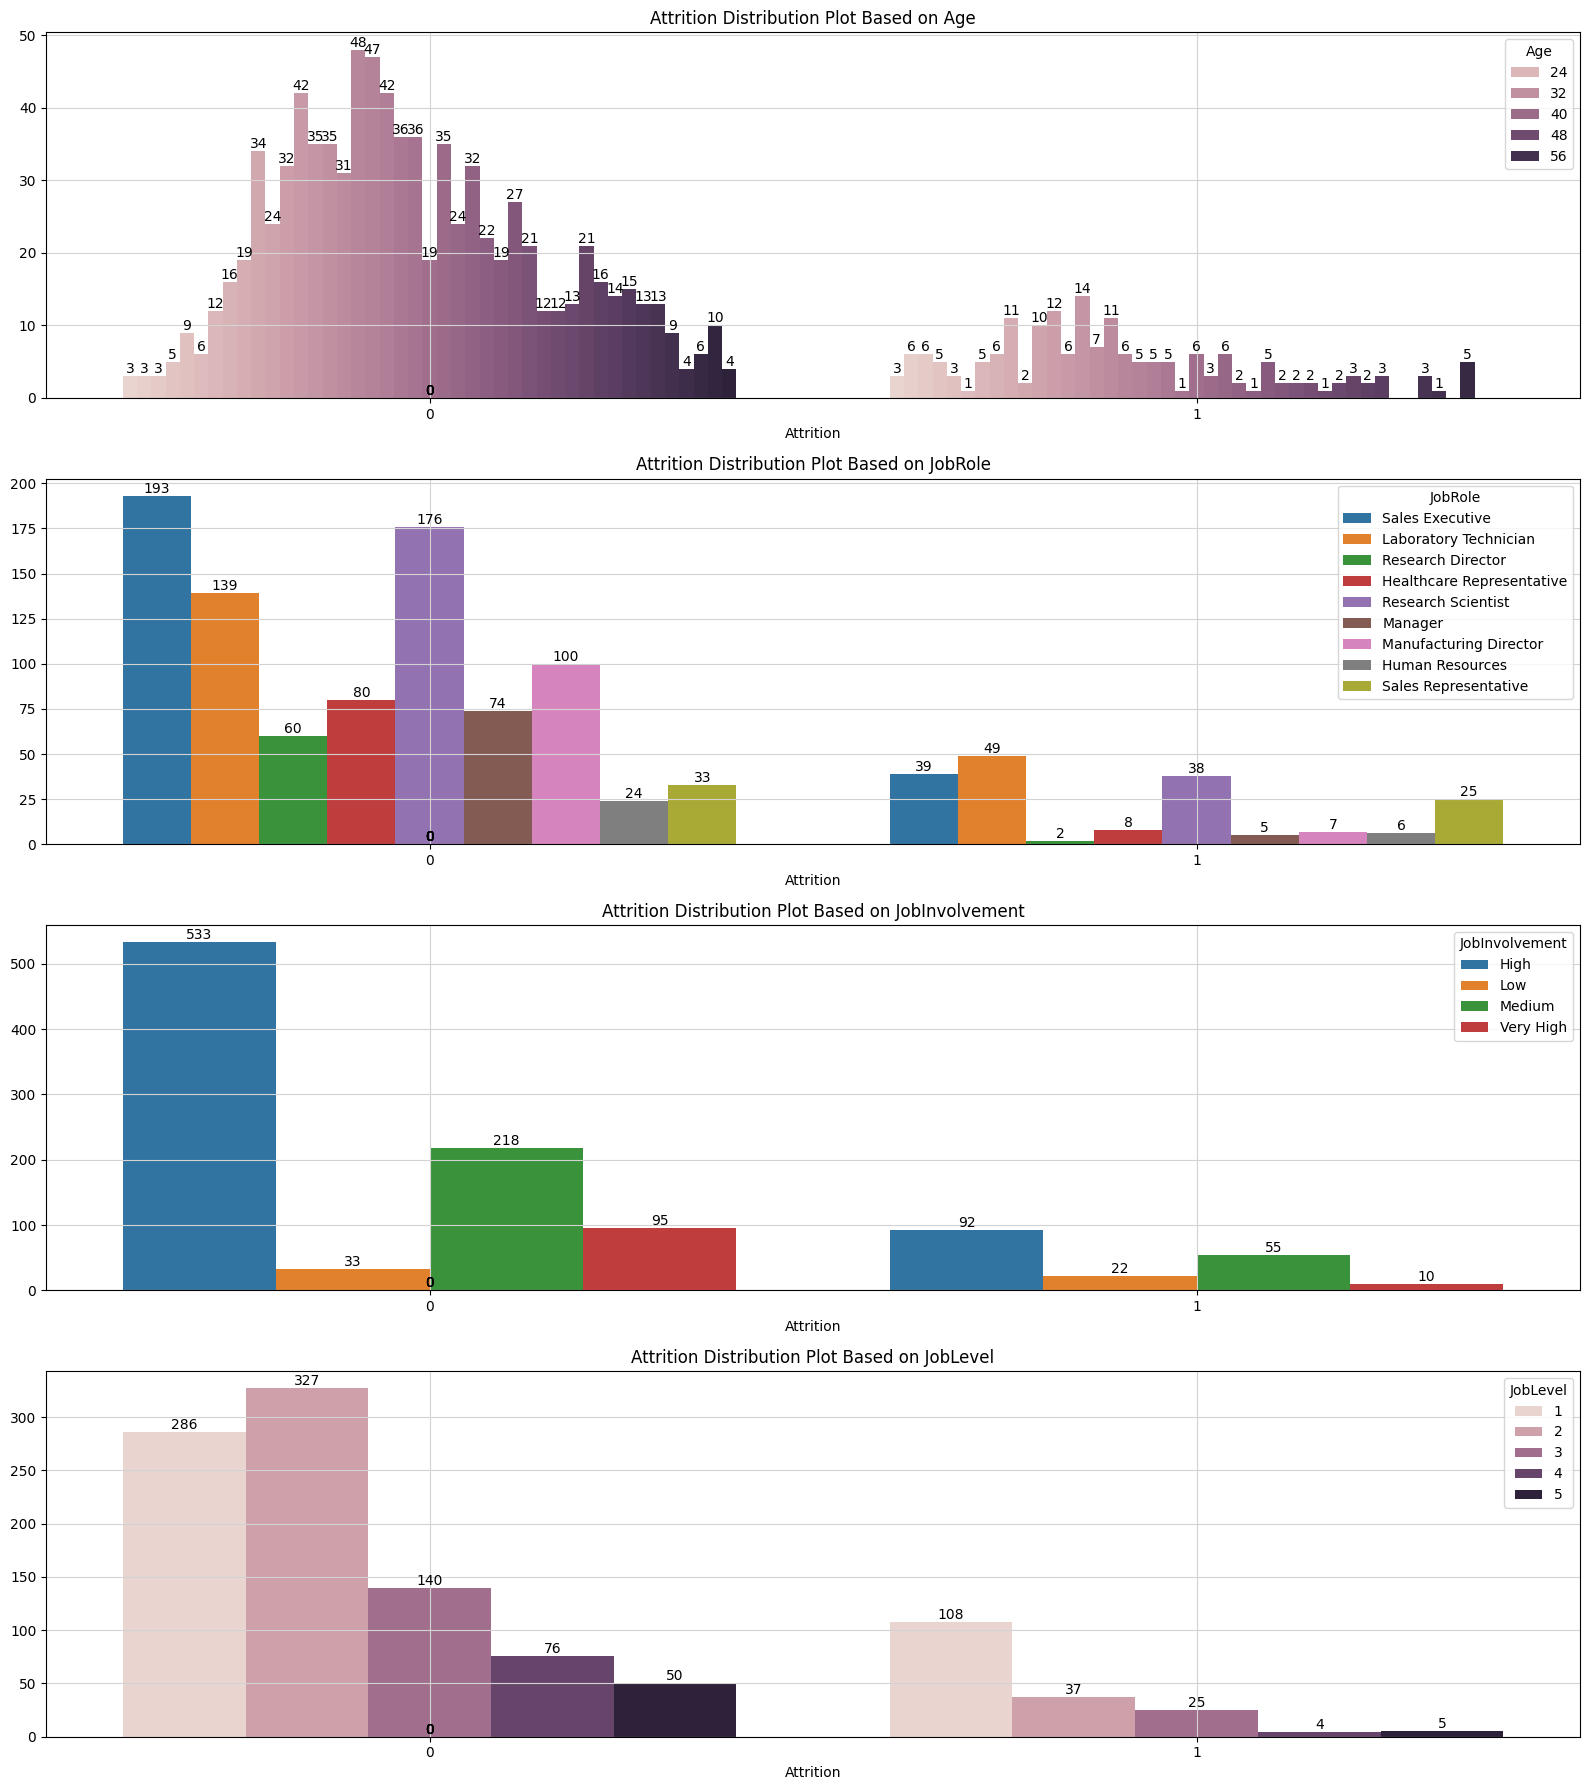

In [ ]:
categorical_dis_plot(
    features=['Age', 'JobRole', 'JobInvolvement', 'JobLevel'],
    df=df,
    segment_feature='Attrition'
)

From the Attrition plot above, we can conclude:
1. Based on the age, the number of employees who perform attrition when they are 19 years old, and in their twenties and thirties. While the highest attrition rate is at the age of 31. And employees in their fifties such as 53, 54, 57, 59 actually prefer to stay in their company.
2.  Based on the job role, the number of employees who have the highest attrition is those who have the role of Laboratory technician, while the least is those who have the role of Research Director. In addition, employees who have the role of Sales Representative have a fairly high attrition rate that is almost close to the overall population.
3. Based on the job involvement, employees who have low job involvement have a tendency to perform attrition which is clearly seen to be close to the population as a whole.
4. Based on the job level, the higher the job level, the smaller the tendency for employees to perform attrition.

# **3. Data Preprocessing**

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4


In this dataset, the label features used are attrition, whether the employee left the company (1 for yes), and whether or not the employee stayed and left the company (0 for no).

## **3.1 Feature Selection**

Because there are several features that do not contribute or influence the attrition rate in this dataset, for example EmployeeID, these feature need to be removed so that the Machine Learning model only trains the model from the most influential data feature.

In [ ]:
# Drop the unnecessary feature
df = df.drop('EmployeeId', axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Low,80,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,High,80,3,18,2,Very High,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Very High,80,1,23,2,Very High,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,High,80,3,6,2,Medium,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,Male,...,Low,80,0,10,2,Medium,10,7,1,9
1465,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Medium,80,1,6,0,High,4,2,0,0


## **3.2 Label Encoding**

In [ ]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [ ]:
# Categorical features that need to be encoded
categorical

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

## **3.3 Data Normalization**

In [ ]:
# Numerical features that need to be normalized
numerical

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

## **3.4 Data Checking**

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,1,0.0,0.000000,0.375,0.333333,1,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,0,0.0,1.000000,0.150,0.333333,2,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   float64
 1   Attrition                 1058 non-null   int64  
 2   BusinessTravel            1058 non-null   int64  
 3   DailyRate                 1058 non-null   float64
 4   Department                1058 non-null   int64  
 5   DistanceFromHome          1058 non-null   float64
 6   Education                 1058 non-null   int64  
 7   EducationField            1058 non-null   int64  
 8   EnvironmentSatisfaction   1058 non-null   int64  
 9   Gender                    1058 non-null   int64  
 10  HourlyRate                1058 non-null   float64
 11  JobInvolvement            1058 non-null   int64  
 12  JobLevel                  1058 non-null   float64
 13  JobRole                   1058 non-null   int64  
 14  JobSatisfacti

In [ ]:
df.describe().round(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,...,1058.0000,1058.0,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000
mean,0.4537,0.1692,1.6040,0.5065,1.2656,0.2849,1.6541,2.2552,1.4660,0.5860,...,1.5028,0.0,0.2543,0.2859,0.4616,0.8478,0.1766,0.2367,0.1469,0.2437
std,0.2241,0.3751,0.6647,0.2924,0.5169,0.2872,1.6222,1.3255,1.2154,0.4928,...,1.2143,0.0,0.2792,0.2004,0.2171,1.1160,0.1566,0.2010,0.2178,0.2117
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2857,0.0000,1.0000,0.2600,1.0000,0.0357,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.1500,0.3333,0.0000,0.0750,0.1111,0.0000,0.1176
50%,0.4286,0.0000,2.0000,0.5122,1.0000,0.2143,1.0000,2.0000,1.0000,1.0000,...,2.0000,0.0,0.3333,0.2500,0.5000,0.0000,0.1250,0.1667,0.0667,0.1765
75%,0.5952,0.0000,2.0000,0.7634,2.0000,0.4286,4.0000,3.0000,3.0000,1.0000,...,3.0000,0.0,0.3333,0.4000,0.5000,2.0000,0.2250,0.3889,0.2000,0.4118
max,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,4.0000,5.0000,3.0000,1.0000,...,3.0000,0.0,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000


## **3.5 Data Splitting**

In [ ]:
# Split the data into independent variable (X) and dependent variable (y) as a label
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [ ]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=20241116, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (846, 31)
y_train : (846,)
X_test  : (212, 31)
y_test  : (212,)


# **4. Modelling**

In [ ]:
# Models and metrics initialization
models, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}

models['LR'] = LogisticRegression(class_weight='balanced', max_iter=10000)
models['SVM'] = SVC(class_weight='balanced', max_iter=10000)
models['DT'] = DecisionTreeClassifier(class_weight='balanced')
models['GB'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier(class_weight='balanced')
models['KNN'] = KNeighborsClassifier()
models['NB'] = GaussianNB()

for i in models.keys():
    models[i].fit(X_train, y_train)

    pred = models[i].predict(X_test)

    accuracy[i] = accuracy_score(pred, y_test)
    precision[i] = precision_score(pred, y_test)
    recall[i] = recall_score(pred, y_test)
    f1[i] = f1_score(pred, y_test)

In [ ]:
model_metrics = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys())

model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.750000,0.750000,0.380282,0.504673
SVM,0.735849,0.722222,0.361111,0.481481
DT,0.801887,0.277778,0.384615,0.322581
GB,0.839623,0.361111,0.541667,0.433333
RF,0.844340,0.083333,1.000000,0.153846
KNN,0.830189,0.111111,0.500000,0.181818
NB,0.707547,0.694444,0.328947,0.446429


Based on the evaluation metrics for each model, the Gradient Boosting Classifier has the highest model accuracy among the others, so this model will be used.

In [ ]:
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb

GradientBoostingClassifier()

In [ ]:
y_train_gb = model_gb.predict(X_train)
y_test_gb = model_gb.predict(X_test)

# **5. Evaluation**

In [ ]:
# @title ## **5.1 Evaluation Report Model**
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       703
         1.0       1.00      0.80      0.89       143

    accuracy                           0.97       846
   macro avg       0.98      0.90      0.93       846
weighted avg       0.97      0.97      0.96       846



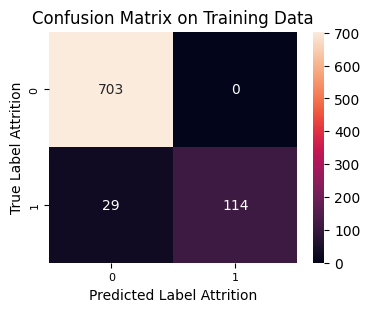

In [ ]:
evaluation_report(y_train, y_train_gb, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       176
         1.0       0.54      0.36      0.43        36

    accuracy                           0.84       212
   macro avg       0.71      0.65      0.67       212
weighted avg       0.82      0.84      0.83       212



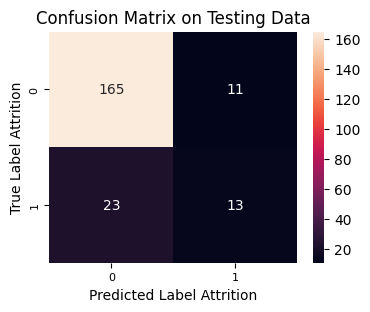

In [ ]:
evaluation_report(y_test, y_test_gb, title='Testing Data')

## **5.2 Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning using Grid Search Cross Validation
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 250, 500],
    'subsample': [1.0],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_depth': [3, 10, 20]

}

clf = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500], 'subsample': [1.0]},
             verbose=3)

In [ ]:
# Fit for the best model params estimators
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GradientBoostingClassifier(loss='exponential', max_depth=10,
                           min_samples_leaf=10, min_samples_split=3)

In [ ]:
# Predict the training and testing data using the best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       703
         1.0       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



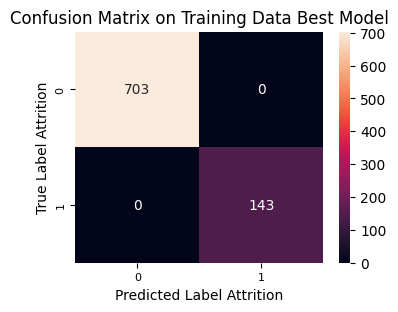

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       176
         1.0       0.61      0.31      0.41        36

    accuracy                           0.85       212
   macro avg       0.74      0.63      0.66       212
weighted avg       0.83      0.85      0.83       212



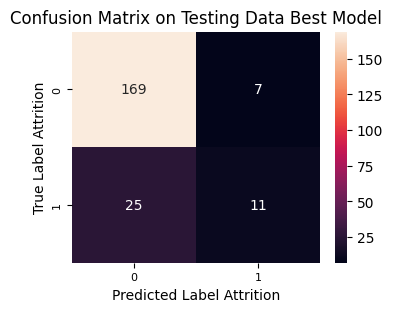

In [ ]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

# **6 Model Export and Project Requirements**

In [ ]:
joblib.dump(best_model, 'model_gb.joblib')

['model_gb.joblib']

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# files.download('model_gb.joblib')
# files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>